In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [53]:
df = pd.read_csv(r'C:\Users\Пажилой биофизик\Downloads\df-chelyaba.csv', encoding = 'windows-1251')
df = df.iloc[:,1:]
df['Название.услуги'] = df['Название.услуги'].map({'Иммуноглобулины класса G к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест")': 'IgG',
                           'Иммуноглобулины класса М к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест")': 'IgM',
                           'Иммуноглобулины класса G к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест")  и  Иммуноглобулины класса М к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест")': 'IgM+IgG'})

In [54]:
df = df[['Пол','Возраст', 'Название.услуги', 'IgM', 'IgG', 'Позиция', 'Результат.ПЦР.при.наличии.в.эту.дату']]
df = df.rename({'Результат.ПЦР.при.наличии.в.эту.дату': 'ПЦР'}, axis=1)

In [50]:
df.head()

,Пол,Возраст,Название.услуги,IgM,IgG,Позиция,ПЦР,IgM_реф,IgG_реф
0,мужской,51.0,IgM+IgG,0.129,0.073,ЧЛ,NaN,False,False
1,женский,48.0,IgM+IgG,5.800,12.800,ЧЛ,NaN,True,True
2,мужской,33.0,IgM+IgG,0.218,0.065,ЧЛ,NaN,False,False
3,женский,39.0,IgM+IgG,0.132,0.136,ЧЛ,NaN,False,False
4,мужской,48.0,IgM+IgG,0.133,0.080,ЧЛ,NaN,False,False


In [48]:
def f(x):
    if pd.isna(x):
        return np.nan
    else:
        return np.where(x > 0.8, np.where(x > 1.1, 'Обнаружено', 'Сомнительно'), 'Не обнаружено')
    
def se(x):
    se = '± ' + str(round(1.96 * np.std(x)/np.sqrt(len(x)), 2))
    return se

def N(x):
    return len(x.dropna())

In [49]:
df['IgM_реф'] = df['IgM'].apply(f).map({'Обнаружено': True, 'Не обнаружено': False})
df['IgG_реф'] = df['IgG'].apply(f).map({'Обнаружено': True, 'Не обнаружено': False})

In [40]:
df['Ser'] = np.any((df['IgM_реф'] == 'Обнаружено', df['IgG_реф'] == 'Обнаружено'), axis=0)
df = df[df['Название.услуги'] == 'IgM+IgG']
df.shape

(1783, 10)

In [41]:
df['IgG+IgM'] = np.all((df['IgM_реф'], df['IgG_реф']), axis=0)

# Иммуноглобулины класса G к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест") 	

In [44]:
df.groupby(['Позиция','Пол']).agg(N  = ('Пол', N),
                                  Seroprevalence = ('Ser', 'count'), 
                                  Seroprevalence_percent = ('Ser', lambda x: round(x.sum()/N(x), 2)))

N  Seroprevalence  Seroprevalence_percent
Позиция Пол                                                 
П       женский  310             310                   False
        мужской  781             781                   False
ЧЛ      женский  372             372                   False
        мужской  320             320                   False

In [31]:
df['Ser'].sum()/len(df['Ser'])

0.28379136287156476

In [9]:
df['Ser'].sum()

506

In [8]:
df.groupby(['Пол']).agg(N  = ('Пол', N),
                                  Seroprevalence = ('Ser', lambda x: x.sum()), 
                                  Seroprevalence_percent = ('Ser', lambda x: round(x.sum()/N(x), 4)))

,N,Seroprevalence,Seroprevalence_percent
Пол,,,
женский,682,254,0.3724
мужской,1101,252,0.2289


In [36]:
df.groupby(['Позиция']).agg(N  = ('Позиция', N),
                            Seroprevalence = ('Ser', lambda x: x.sum()), 
                            Seroprevalence_percent = ('Ser', lambda x: round(x.sum()/N(x), 4)),
                            IgG = ('IgG', np.mean),
                            IgG_percent = ('IgG_реф', lambda x: round(x.sum()/N(x), 4)),
                            IgM = ('IgM', np.mean),
                            IgM_percent = ('IgM_реф', lambda x: round(x.sum()/N(x), 4)),
                            IgM_IgG = ('IgG+IgM', lambda x: x.sum()),
                            IgM_IgG_percent = ('IgG+IgM',lambda x: round(x.sum()/N(x), 4)),
                            doubtful = ('IgG+IgM', lambda x: pd.isnull(x).sum()))

,N,Seroprevalence,Seroprevalence_percent,IgG,IgG_percent,IgM,IgM_percent,IgM_IgG,IgM_IgG_percent,doubtful
Позиция,,,,,,,,,,
П,1091,188,0.1723,1.878833,0.1496,0.873246,0.1285,117,0.1077,5
ЧЛ,692,318,0.4595,5.203201,0.4202,2.728855,0.3816,247,0.3601,6


In [11]:
df.groupby(['Позиция','Пол']).agg(IgG = ('IgG', 'mean'), 
                                  IgM = ('IgM', 'mean'),)

IgG       IgM
Позиция Пол                        
П       женский  2.902194  1.224232
        мужской  1.472634  0.733930
ЧЛ      женский  5.609051  2.478228
        мужской  4.731400  3.020209

In [12]:
df1 = df[df['Название.услуги'] == 'IgG']
df1 = df1.drop(['IgM', 'IgM_реф'], axis =1)

In [9]:
df1['IgG_реф'].value_counts()

Series([], Name: IgG_реф, dtype: int64)

In [27]:
df1.groupby('IgG_реф').agg(Возраст = ('Возраст', np.mean),
                           sd = ('Возраст', np.std),
                           se  = ('Возраст', se),
                            N  = ('Возраст', N))

,Возраст,sd,se,N
IgG_реф,,,,
Не обнаружено,45.612245,14.799798,± 4.1,49.0
Обнаружено,42.018349,13.161378,± 2.45,109.0
Сомнительно,57.000000,NaN,± 0.0,1.0


In [12]:
df1.groupby(['IgG_реф', 'Пол']).agg(N  = ('Пол', N))

N
IgG_реф       Пол        
Не обнаружено женский  38
              мужской  11
Обнаружено    женский  76
              мужской  34
Сомнительно   женский   1

In [29]:
df1.groupby(['IgG_реф', 'Позиция']).agg(N  = ('Позиция', N))

N
IgG_реф       Позиция    
Не обнаружено П        29
              ЧЛ       20
Обнаружено    П        60
              ЧЛ       50
Сомнительно   П         1

### Нормальность по полу и позиции

In [104]:
df1[['Пол', 'IgG']].dropna().groupby(by='Пол').agg(lambda x: stat.shapiro(np.log(x)).pvalue)

,IgG
Пол,
женский,1.212483e-10
мужской,2.760785e-07


In [106]:
df1[['Позиция', 'IgG']].dropna().groupby(by='Позиция').agg(lambda x: stat.shapiro(np.log(x)).pvalue)

,IgG
Позиция,
П,6.415627e-10
ЧЛ,4.041995e-08


### Описательная

In [150]:
# По полу
df1.groupby('Пол').agg(Mean = ('IgG', np.mean),
                        sd  = ('IgG', np.std),
                        se  = ('IgG', se),
                         N  = ('IgG', N))

,Mean,sd,se,N
Пол,,,,
женский,9.672191,9.101184,± 1.66,115.0
мужской,11.526889,9.222889,± 2.66,45.0


In [149]:
# По позиции
df1.groupby('Позиция').agg(Mean = ('IgG', np.mean),
                            sd  = ('IgG', np.std),
                            se  = ('IgG', se),
                             N  = ('IgG', N))

,Mean,sd,se,N
Позиция,,,,
П,10.422111,9.434813,± 1.94,90.0
ЧЛ,9.900314,8.816693,± 2.05,70.0


In [151]:
# По возрасту
df1['Возраст'].agg([np.mean, np.std, se, N])

mean    43.2201
std     13.7448
se       ± 2.12
N           159
Name: Возраст, dtype: object

# Парные сравнения

In [64]:
df1 = df[df['Название.услуги'] == "IgG"]

In [66]:
# Сравнение по полу Wilcox
logic = df1['Пол'] == 'мужской'
stat.ranksums(df1.loc[logic, 'IgG'], df1.loc[~logic, 'IgG'])

RanksumsResult(statistic=0.8121500610522151, pvalue=0.41670553075847705)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


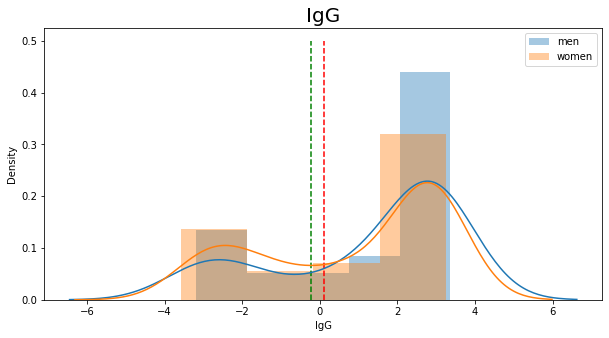

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(ax=ax, a=np.log(df1.loc[logic, 'IgG']), label='men')
sns.distplot(ax=ax, a=np.log(df1.loc[~logic, 'IgG']), label='women')
ax.vlines(np.log(0.8), 0, 0.5, color='g', linestyle='--')
ax.vlines(np.log(1.1), 0, 0.5, color='r', linestyle='--')
ax.set_title('IgG', fontsize = 20)
ax.legend()

In [72]:
# Сравнение по положению Wilcox
logic = df1['Позиция'] == 'ЧЛ'
stat.ranksums(df1.loc[logic, 'IgG'], df1.loc[~logic, 'IgG'])

RanksumsResult(statistic=-0.1736995880237527, pvalue=0.8621015613123777)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


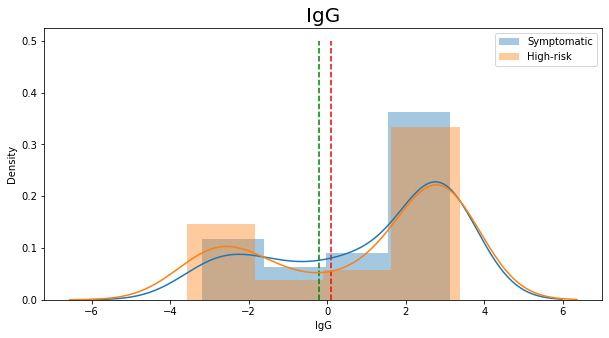

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(ax=ax, a=np.log(df1.loc[logic, 'IgG']), label='Symptomatic')
sns.distplot(ax=ax, a=np.log(df1.loc[~logic, 'IgG']), label='High-risk')
ax.vlines(np.log(0.8), 0, 0.5, color='g', linestyle='--')
ax.vlines(np.log(1.1), 0, 0.5, color='r', linestyle='--')
ax.set_title('IgG', fontsize = 20)
ax.legend()

# Иммуноглобулины класса М к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест") 

In [75]:
df2 = df[df['Название.услуги'] == 'IgM']
df2 = df2.drop(['IgG', 'IgG_реф'], axis =1)

In [ ]:
df2['IgM_реф'].value_counts()

In [18]:
df2.groupby('IgM_реф').agg(Возраст = ('Возраст', np.mean),
                           sd = ('Возраст', np.std),
                           se  = ('Возраст', se),
                            N  = ('Возраст', N))

,Возраст,sd,se,N
IgM_реф,,,,
Не обнаружено,40.896226,13.002512,± 2.46,106.0
Обнаружено,41.857143,14.167367,± 4.63,35.0


In [19]:
df2.groupby(['IgM_реф', 'Пол']).agg(N  = ('Пол', N))

N
IgM_реф       Пол        
Не обнаружено женский  39
              мужской  67
Обнаружено    женский  19
              мужской  16

In [31]:
df2.groupby(['IgM_реф', 'Позиция']).agg(N  = ('Позиция', N))

N
IgM_реф       Позиция    
Не обнаружено П        64
              ЧЛ       42
Обнаружено    П        12
              ЧЛ       23

### Нормальность по полу и позиции

In [157]:
df2[['Пол', 'IgM']].dropna().groupby(by='Пол').agg(lambda x: stat.shapiro(np.log(x)).pvalue)

,IgM
Пол,
женский,7.563347e-04
мужской,5.871290e-10


In [159]:
df2[['Позиция', 'IgM']].dropna().groupby(by='Позиция').agg(lambda x: stat.shapiro(np.log(x)).pvalue)

,IgM
Позиция,
П,3.352369e-09
ЧЛ,2.404680e-04


### Описательная

In [161]:
# По полу
df2.groupby('Пол').agg(Mean = ('IgM', np.mean),
                        sd  = ('IgM', np.std),
                        se  = ('IgM', se),
                         N  = ('IgM', N))

,Mean,sd,se,N
Пол,,,,
женский,1.290862,2.068144,± 0.53,58.0
мужской,1.799265,4.372553,± 0.94,83.0


In [162]:
# По позиции
df2.groupby('Позиция').agg(Mean = ('IgM', np.mean),
                        sd  = ('IgM', np.std),
                        se  = ('IgM', se),
                         N  = ('IgM', N))

,Mean,sd,se,N
Позиция,,,,
П,0.848697,2.271918,± 0.51,76.0
ЧЛ,2.457046,4.580278,± 1.1,65.0


In [113]:
# По возрасту
df2['Возраст'].agg([np.mean, np.std, se, N])

mean    39.1888
std      12.282
se       ± 0.57
N          1774
Name: Возраст, dtype: object

In [77]:
# Сравнение по полу Wilcox
logic = df['Пол'] == 'мужской'
stat.ranksums(df.loc[logic, 'IgG'], df.loc[~logic, 'IgG'])
#Есть отличие

RanksumsResult(statistic=-6.2221105365964355, pvalue=4.905112457746712e-10)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


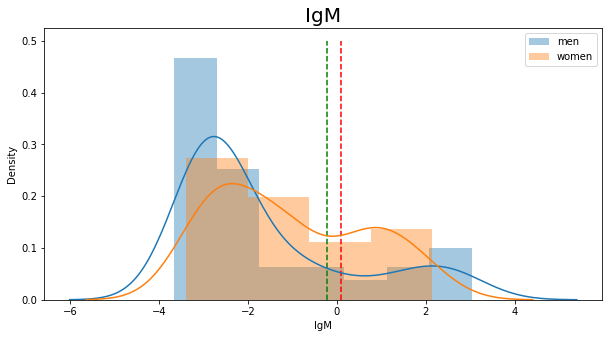

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(ax=ax, a=np.log(df2.loc[logic, 'IgM']), label='men')
sns.distplot(ax=ax, a=np.log(df2.loc[~logic, 'IgM']), label='women')
ax.vlines(np.log(0.8), 0, 0.5, color='g', linestyle='--')
ax.vlines(np.log(1.1), 0, 0.5, color='r', linestyle='--')
ax.set_title('IgM', fontsize = 20)
ax.legend()

In [80]:
# Сравнение по положению Wilcox
logic = df['Позиция'] == 'ЧЛ'
stat.ranksums(df.loc[logic, 'IgG'], df.loc[~logic, 'IgG'])
# Есть отличия

RanksumsResult(statistic=11.104996986888818, pvalue=1.18621346262704e-28)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


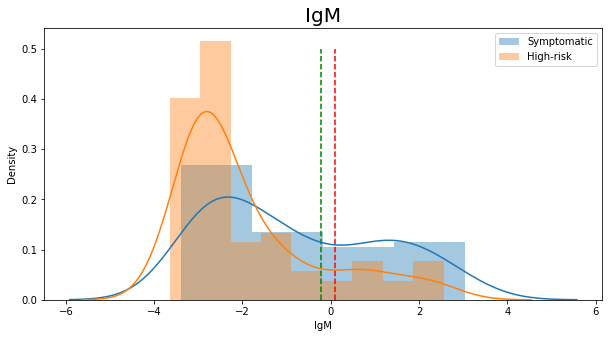

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(ax=ax, a=np.log(df2.loc[logic, 'IgM']), label='Symptomatic')
sns.distplot(ax=ax, a=np.log(df2.loc[~logic, 'IgM']), label='High-risk')
ax.vlines(np.log(0.8), 0, 0.5, color='g', linestyle='--')
ax.vlines(np.log(1.1), 0, 0.5, color='r', linestyle='--')
ax.set_title('IgM', fontsize = 20)
ax.legend()

# Иммуноглобулины класса G к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест") и Иммуноглобулины класса М к вирусу SARS-CoV-2 (Covid-19) методом ИФА (ЗАО "ВекторБест") 	

In [20]:
df3 = df[df['Название.услуги'] == 'IgM+IgG']

In [22]:
df3['Результат'] = df3[['IgM_реф', 'IgG_реф']].apply(lambda x: f'IgM: {x[0]} | IgG: {x[1]}', axis=1)
df3['Результат']

<ipython-input-22-43914813de64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Результат'] = df3[['IgM_реф', 'IgG_реф']].apply(lambda x: f'IgM: {x[0]} | IgG: {x[1]}', axis=1)


0       IgM: Не обнаружено | IgG: Не обнаружено
1             IgM: Обнаружено | IgG: Обнаружено
2       IgM: Не обнаружено | IgG: Не обнаружено
3       IgM: Не обнаружено | IgG: Не обнаружено
4       IgM: Не обнаружено | IgG: Не обнаружено
                         ...                   
1778       IgM: Не обнаружено | IgG: Обнаружено
1779          IgM: Обнаружено | IgG: Обнаружено
1780    IgM: Не обнаружено | IgG: Не обнаружено
1781    IgM: Не обнаружено | IgG: Не обнаружено
1782          IgM: Обнаружено | IgG: Обнаружено
Name: Результат, Length: 1783, dtype: object

In [23]:
df3.groupby('Результат').agg(Возраст = ('Возраст', np.mean),
                           sd = ('Возраст', np.std),
                           se  = ('Возраст', se),
                            N  = ('Возраст', N))

,Возраст,sd,se,N
Результат,,,,
IgM: Не обнаружено | IgG: Не обнаружено,38.474563,11.835040,± 0.65,1258.0
IgM: Не обнаружено | IgG: Обнаружено,36.729412,13.491963,± 2.85,85.0
IgM: Не обнаружено | IgG: Сомнительно,36.666667,13.515423,± 9.87,6.0
IgM: Обнаружено | IgG: Не обнаружено,42.200000,11.563265,± 3.3,45.0
IgM: Обнаружено | IgG: Обнаружено,41.786145,13.450796,± 1.44,332.0
IgM: Обнаружено | IgG: Сомнительно,44.545455,11.578978,± 6.52,11.0
IgM: Сомнительно | IgG: Не обнаружено,40.444444,10.038814,± 6.18,9.0
IgM: Сомнительно | IgG: Обнаружено,41.142857,10.518817,± 3.76,28.0


In [25]:
df3.groupby(['Результат','Пол']).agg(N  = ('Пол', N))

N
Результат                               Пол         
IgM: Не обнаружено | IgG: Не обнаружено женский  423
                                        мужской  839
IgM: Не обнаружено | IgG: Обнаружено    женский   41
                                        мужской   44
IgM: Не обнаружено | IgG: Сомнительно   женский    3
                                        мужской    3
IgM: Обнаружено | IgG: Не обнаружено    женский   21
                                        мужской   25
IgM: Обнаружено | IgG: Обнаружено       женский  165
                                        мужской  170
IgM: Обнаружено | IgG: Сомнительно      женский    8
                                        мужской    3
IgM: Сомнительно | IgG: Не обнаружено   женский    2
                                        мужской    7
IgM: Сомнительно | IgG: Обнаружено      женский   19
                                        мужской   10

In [33]:
df3.groupby(['Результат', 'Позиция']).agg(N  = ('Позиция', N))

N
Результат                               Позиция     
IgM: Не обнаружено | IgG: Не обнаружено П        895
                                        ЧЛ       367
IgM: Не обнаружено | IgG: Обнаружено    П         45
                                        ЧЛ        40
IgM: Не обнаружено | IgG: Сомнительно   П          3
                                        ЧЛ         3
IgM: Обнаружено | IgG: Не обнаружено    П         21
                                        ЧЛ        25
IgM: Обнаружено | IgG: Обнаружено       П        113
                                        ЧЛ       222
IgM: Обнаружено | IgG: Сомнительно      П          5
                                        ЧЛ         6
IgM: Сомнительно | IgG: Не обнаружено   П          5
                                        ЧЛ         4
IgM: Сомнительно | IgG: Обнаружено      П          4
                                        ЧЛ        25

In [111]:
stat.spearmanr((df[['IgM', 'IgG']].dropna()))

SpearmanrResult(correlation=0.6526511470933151, pvalue=6.366399422964868e-217)

In [134]:
# Сравнение по ПЦР Wilcox
logic = df['ПЦР'] == 'Не обнаружено'
stat.ranksums(df.loc[logic, 'IgM'], df.loc[~logic, 'IgM'])

RanksumsResult(statistic=-1.5062487983877988, pvalue=0.13200331666956427)

In [132]:
df['ПЦР'].dropna()

16      Не обнаружено
52      Не обнаружено
60      Не обнаружено
69      Не обнаружено
70      Не обнаружено
            ...      
1663    Не обнаружено
1664    Не обнаружено
1668    Не обнаружено
1678       ОБНАРУЖЕНО
1736    Не обнаружено
Name: ПЦР, Length: 106, dtype: object

# Прошлогодняя залупа

In [5]:
df = pd.read_excel(r'C:\Users\Пажилой биофизик\Downloads\MD.xlsx', header=1)

In [14]:
df['Other'] = df['Количество свисаний']+df['Количество болюсов']+df['Грызение']+df['чих']+df['замирания']

In [12]:
df.columns

Index(['порядковый номер ', 'Группа 1',
       'Группа 2(0-контроль, 1-высокотревожные, 2-низкотревожные)',
       'ВРЕМЯ В ОТКРЫТЫХ РУКАВАХ, сек', 'ВРЕМЯ ЦЕНТР, сек',
       'ВРЕМЯ "ОТКРЫТЫЕ+ЦЕНТР", сек', 'ВРЕМЯ В ЗАКРЫТЫХ РУКАВАХ, сек',
       'Количество заходов в центр', 'Количество заходов в открытые рукава',
       'Количество заходов в закрытые рукава', 'Общее количество заходов',
       'Переходы открытые ', 'Переходы закрытые', 'Переходы общее',
       'Количество стоек', 'Количество свисаний', 'Количество актов груминга',
       'Общее время груминга, сек', 'Количество актов сниффинга',
       'Вытягивания', 'Выглядывания', 'Количество болюсов', 'Грызение', 'чих',
       'замирания', 'время замирания', 'ИТ'],
      dtype='object')

In [15]:
df.groupby('Группа 1')[['Количество стоек','Other']].apply(np.mean)

,Количество стоек,Other
Группа 1,,
MD,39.073171,5.195122
контроль,30.642857,1.928571
